### Import visualization and machine learning libraries 

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Set path

In [150]:
corn_path = "/Users/patrickboland4/p_code/projects/factors_influencing_corn_prices/data/csvs_from_jupyter_nb/corn.csv"

### Importing the csv file we created in the "Preparing the climate, corn, ethanol data" Jupyter notebook

** Let's import the file **

In [151]:
corn = pd.read_csv(corn_path)

In [152]:
corn.head()

,Year,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,...,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,FPRICE,Ethanol
0,1980.0,304.604651,298.058140,419.250000,611.581395,741.034884,816.360465,894.093023,853.906977,772.098837,...,6639.0,2034.0,8675.0,2391.0,4232.0,659.0,7282.0,1392.0,3.12,35.0
1,1981.0,347.028902,399.289017,513.040462,666.930636,686.184971,818.265896,838.728324,810.294798,749.173410,...,8119.0,1392.0,9511.0,1997.0,4245.0,733.0,6975.0,2537.0,2.47,86.0
2,1982.0,222.075000,319.181250,448.562500,569.743750,738.812500,756.750000,851.362500,811.625000,729.931250,...,8235.0,2537.0,10772.0,1821.0,4573.0,855.0,7249.0,3523.0,2.55,140.0
3,1983.0,325.353659,391.920732,458.615854,535.060976,675.115854,802.621951,890.926829,900.695122,778.585366,...,4174.0,3523.0,7699.0,1886.0,3876.0,930.0,6693.0,1006.0,3.21,160.0
4,1984.0,279.734177,420.525316,386.132911,567.702532,686.575949,824.164557,844.221519,863.170886,731.164557,...,7672.0,1006.0,8680.0,1850.0,4115.0,1067.0,7032.0,1648.0,2.63,232.0


Our goal is to to have 'Year' be represented in the index as a datetime object. Let's have a look at the dtype of the 'Year' column

In [153]:
type(corn['Year'][0])

numpy.float64

Let's convert objects within the 'Year' column to string

In [154]:
corn['Year'] = corn['Year'].apply(str)

Verifying the above code worked

In [155]:
type(corn['Year'][0])

str

In [156]:
corn['Year'][0]

'1980.0'

In [157]:
corn['Year'] = corn['Year'].apply(lambda x: x.split('.')[0])

In [158]:
corn['Year'][0]

'1980'

** Convert the 'Year' column to a datetime object **

In [159]:
corn['Year'] = pd.to_datetime(corn['Year'], infer_datetime_format=True)

In [160]:
corn.head()

,Year,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,...,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,FPRICE,Ethanol
0,1980-01-01,304.604651,298.058140,419.250000,611.581395,741.034884,816.360465,894.093023,853.906977,772.098837,...,6639.0,2034.0,8675.0,2391.0,4232.0,659.0,7282.0,1392.0,3.12,35.0
1,1981-01-01,347.028902,399.289017,513.040462,666.930636,686.184971,818.265896,838.728324,810.294798,749.173410,...,8119.0,1392.0,9511.0,1997.0,4245.0,733.0,6975.0,2537.0,2.47,86.0
2,1982-01-01,222.075000,319.181250,448.562500,569.743750,738.812500,756.750000,851.362500,811.625000,729.931250,...,8235.0,2537.0,10772.0,1821.0,4573.0,855.0,7249.0,3523.0,2.55,140.0
3,1983-01-01,325.353659,391.920732,458.615854,535.060976,675.115854,802.621951,890.926829,900.695122,778.585366,...,4174.0,3523.0,7699.0,1886.0,3876.0,930.0,6693.0,1006.0,3.21,160.0
4,1984-01-01,279.734177,420.525316,386.132911,567.702532,686.575949,824.164557,844.221519,863.170886,731.164557,...,7672.0,1006.0,8680.0,1850.0,4115.0,1067.0,7032.0,1648.0,2.63,232.0


** Set the index on the corn df to the 'Year' column **

In [161]:
corn = corn.set_index('Year')

In [162]:
corn.head()

,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,Oct_tmax,...,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,FPRICE,Ethanol
Year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,304.604651,298.058140,419.250000,611.581395,741.034884,816.360465,894.093023,853.906977,772.098837,613.279070,...,6639.0,2034.0,8675.0,2391.0,4232.0,659.0,7282.0,1392.0,3.12,35.0
1981-01-01,347.028902,399.289017,513.040462,666.930636,686.184971,818.265896,838.728324,810.294798,749.173410,605.335260,...,8119.0,1392.0,9511.0,1997.0,4245.0,733.0,6975.0,2537.0,2.47,86.0
1982-01-01,222.075000,319.181250,448.562500,569.743750,738.812500,756.750000,851.362500,811.625000,729.931250,636.381250,...,8235.0,2537.0,10772.0,1821.0,4573.0,855.0,7249.0,3523.0,2.55,140.0
1983-01-01,325.353659,391.920732,458.615854,535.060976,675.115854,802.621951,890.926829,900.695122,778.585366,626.939024,...,4174.0,3523.0,7699.0,1886.0,3876.0,930.0,6693.0,1006.0,3.21,160.0
1984-01-01,279.734177,420.525316,386.132911,567.702532,686.575949,824.164557,844.221519,863.170886,731.164557,632.987342,...,7672.0,1006.0,8680.0,1850.0,4115.0,1067.0,7032.0,1648.0,2.63,232.0


Verfiy that were now working with a timeseries index

In [163]:
type(corn.index)

pandas.tseries.index.DatetimeIndex

In [164]:
corn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1980-01-01 to 2014-01-01
Data columns (total 52 columns):
Jan_tmax          35 non-null float64
Feb_tmax          35 non-null float64
Mar_tmax          35 non-null float64
Apr_tmax          35 non-null float64
May_tmax          35 non-null float64
Jun_tmax          35 non-null float64
Jul_tmax          35 non-null float64
Aug_tmax          35 non-null float64
Sep_tmax          35 non-null float64
Oct_tmax          35 non-null float64
Nov_tmax          35 non-null float64
Dec_tmax          35 non-null float64
Avg/Total_tmax    35 non-null float64
Jan_tmin          35 non-null float64
Feb_tmin          35 non-null float64
Mar_tmin          35 non-null float64
Apr_tmin          35 non-null float64
May_tmin          35 non-null float64
Jun_tmin          35 non-null float64
Jul_tmin          35 non-null float64
Aug_tmin          35 non-null float64
Sep_tmin          35 non-null float64
Oct_tmin          35 non-null float64
Nov

### Standardizing the feature columns within the corn dataframe

Import StandardScaler from Scikitlearn

In [165]:
from sklearn.preprocessing import StandardScaler

Create a StandardScaler() object called scaler

In [166]:
scaler = StandardScaler()

Fit scaler to the features

In [167]:
scaler.fit(corn.drop('FPRICE', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Use the `.transform()` method to to transform the features to a scaled version

In [168]:
scaled_features = scaler.transform(corn.drop('FPRICE', axis=1))

Check out the scaled_features matrix

In [169]:
scaled_features

array([[-0.26156849, -1.20877877, -1.27155066, ..., -1.03205732,
        -0.37630039, -0.81849771],
       [ 0.59875655,  0.69404477,  0.67393433, ..., -1.17526904,
         0.78945703, -0.78946075],
       [-1.93519441, -0.81173043, -0.66352478, ..., -1.04745142,
         1.79333198, -0.75871573],
       ..., 
       [ 1.44096928,  0.82981423,  3.32171282, ...,  0.74106231,
        -0.9576519 ,  1.80401101],
       [ 0.51445838, -0.22055481, -1.49345807, ...,  1.84710458,
        -0.53920099,  2.07875933],
       [-0.53291587, -1.66234984, -0.88461284, ...,  1.98425196,
        -0.03115474,  2.12225784]])

Convert scaled_features to a dataframe and check the head

In [170]:
cs = pd.DataFrame(scaled_features, columns=corn.drop('FPRICE', axis=1).columns)

In [171]:
cs.head()

,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,Oct_tmax,...,YIELD,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,Ethanol
0,-0.261568,-1.208779,-1.271551,-0.053803,0.672712,0.240736,1.489350,0.789751,0.541470,-0.622868,...,-1.728805,-1.190893,0.268244,-1.269583,1.664195,-1.206803,-1.043144,-1.032057,-0.376300,-0.818498
1,0.598757,0.694045,0.673934,1.498129,-1.093146,0.320190,-0.459213,-0.831874,-0.332024,-0.901915,...,-0.915242,-0.568289,-0.384712,-0.858376,0.482341,-1.186625,-1.004344,-1.175269,0.789457,-0.789461
2,-1.935194,-0.811730,-0.663525,-1.226884,0.601164,-2.244956,-0.014553,-0.782413,-1.065179,0.188657,...,-0.719805,-0.519490,0.779828,-0.238123,-0.045594,-0.677527,-0.940378,-1.047451,1.793332,-0.758716
3,0.159202,0.555544,-0.454989,-2.199351,-1.449509,-0.332145,1.377915,2.529468,0.788616,-0.143026,...,-2.178764,-2.227866,1.782654,-1.749652,0.149382,-1.759361,-0.901055,-1.306819,-0.769298,-0.747329
4,-0.765919,1.093221,-1.958495,-1.284118,-1.080558,0.566158,-0.265880,1.134210,-1.018188,0.069437,...,-1.015233,-0.756332,-0.777299,-1.267123,0.041395,-1.388402,-0.829224,-1.148679,-0.115659,-0.706335


Call the `.set_index()` method to persist the corn.index

In [172]:
cs = cs.set_index(corn.index)

In [173]:
cs.head()

,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,Oct_tmax,...,YIELD,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,Ethanol
Year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,-0.261568,-1.208779,-1.271551,-0.053803,0.672712,0.240736,1.489350,0.789751,0.541470,-0.622868,...,-1.728805,-1.190893,0.268244,-1.269583,1.664195,-1.206803,-1.043144,-1.032057,-0.376300,-0.818498
1981-01-01,0.598757,0.694045,0.673934,1.498129,-1.093146,0.320190,-0.459213,-0.831874,-0.332024,-0.901915,...,-0.915242,-0.568289,-0.384712,-0.858376,0.482341,-1.186625,-1.004344,-1.175269,0.789457,-0.789461
1982-01-01,-1.935194,-0.811730,-0.663525,-1.226884,0.601164,-2.244956,-0.014553,-0.782413,-1.065179,0.188657,...,-0.719805,-0.519490,0.779828,-0.238123,-0.045594,-0.677527,-0.940378,-1.047451,1.793332,-0.758716
1983-01-01,0.159202,0.555544,-0.454989,-2.199351,-1.449509,-0.332145,1.377915,2.529468,0.788616,-0.143026,...,-2.178764,-2.227866,1.782654,-1.749652,0.149382,-1.759361,-0.901055,-1.306819,-0.769298,-0.747329
1984-01-01,-0.765919,1.093221,-1.958495,-1.284118,-1.080558,0.566158,-0.265880,1.134210,-1.018188,0.069437,...,-1.015233,-0.756332,-0.777299,-1.267123,0.041395,-1.388402,-0.829224,-1.148679,-0.115659,-0.706335


** Reattach the FPRICE column **

To make this operation a bit simpler, we will assign the 'FPRICE' to its own dataframe (fp)

In [174]:
fp = corn[['FPRICE']]

In [175]:
fp.head()

,FPRICE
Year,
1980-01-01,3.12
1981-01-01,2.47
1982-01-01,2.55
1983-01-01,3.21
1984-01-01,2.63


In [184]:
cs = cs.merge(fp,left_index=True, right_index=True)

In [185]:
cs.head()

,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,Oct_tmax,...,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,Ethanol,FPRICE
Year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,-0.261568,-1.208779,-1.271551,-0.053803,0.672712,0.240736,1.489350,0.789751,0.541470,-0.622868,...,-1.190893,0.268244,-1.269583,1.664195,-1.206803,-1.043144,-1.032057,-0.376300,-0.818498,3.12
1981-01-01,0.598757,0.694045,0.673934,1.498129,-1.093146,0.320190,-0.459213,-0.831874,-0.332024,-0.901915,...,-0.568289,-0.384712,-0.858376,0.482341,-1.186625,-1.004344,-1.175269,0.789457,-0.789461,2.47
1982-01-01,-1.935194,-0.811730,-0.663525,-1.226884,0.601164,-2.244956,-0.014553,-0.782413,-1.065179,0.188657,...,-0.519490,0.779828,-0.238123,-0.045594,-0.677527,-0.940378,-1.047451,1.793332,-0.758716,2.55
1983-01-01,0.159202,0.555544,-0.454989,-2.199351,-1.449509,-0.332145,1.377915,2.529468,0.788616,-0.143026,...,-2.227866,1.782654,-1.749652,0.149382,-1.759361,-0.901055,-1.306819,-0.769298,-0.747329,3.21
1984-01-01,-0.765919,1.093221,-1.958495,-1.284118,-1.080558,0.566158,-0.265880,1.134210,-1.018188,0.069437,...,-0.756332,-0.777299,-1.267123,0.041395,-1.388402,-0.829224,-1.148679,-0.115659,-0.706335,2.63


In [186]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1980-01-01 to 2014-01-01
Data columns (total 52 columns):
Jan_tmax          35 non-null float64
Feb_tmax          35 non-null float64
Mar_tmax          35 non-null float64
Apr_tmax          35 non-null float64
May_tmax          35 non-null float64
Jun_tmax          35 non-null float64
Jul_tmax          35 non-null float64
Aug_tmax          35 non-null float64
Sep_tmax          35 non-null float64
Oct_tmax          35 non-null float64
Nov_tmax          35 non-null float64
Dec_tmax          35 non-null float64
Avg/Total_tmax    35 non-null float64
Jan_tmin          35 non-null float64
Feb_tmin          35 non-null float64
Mar_tmin          35 non-null float64
Apr_tmin          35 non-null float64
May_tmin          35 non-null float64
Jun_tmin          35 non-null float64
Jul_tmin          35 non-null float64
Aug_tmin          35 non-null float64
Sep_tmin          35 non-null float64
Oct_tmin          35 non-null float64
Nov

## Data analysis and visualization
**Note** - We currently have two dataframes, one with unscaled features (corn), and the other with scaled features (cs)

In [58]:
sns.set_style('whitegrid')

Let's visualize the movement of price over time

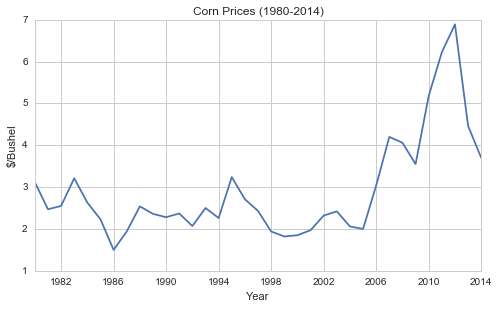

In [201]:
plt.figure(figsize=(8,4.5))
plt.plot(corn['FPRICE'])
plt.title('Corn Prices (1980-2014)')
plt.xlabel('Year')
plt.ylabel('$/Bushel')

Create a heatmap of features

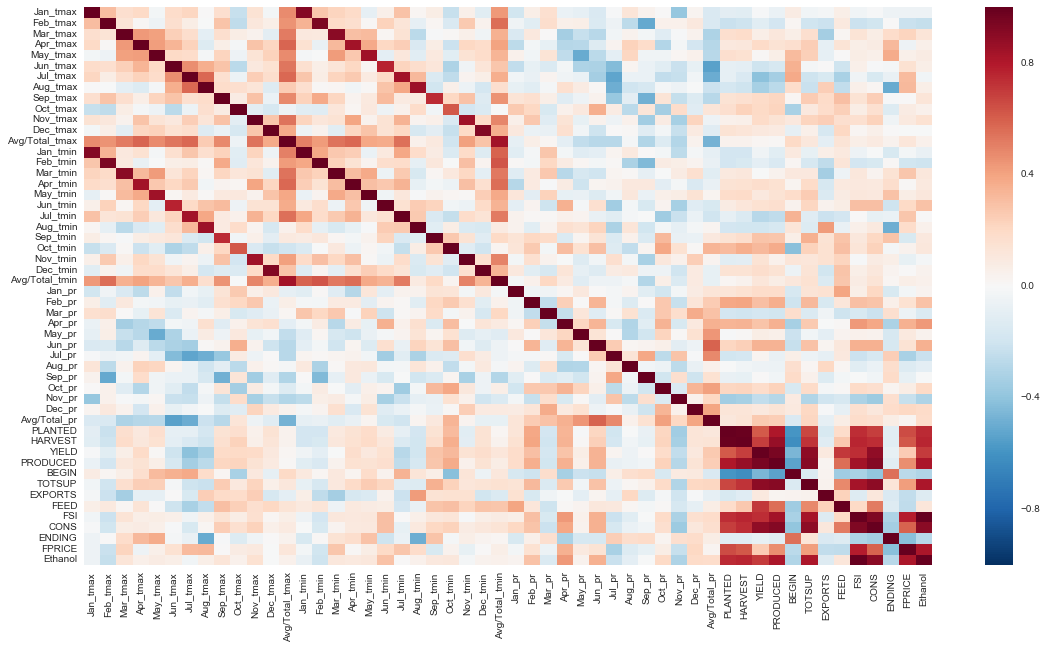

In [206]:
plt.figure(figsize = (19,10))
sns.heatmap(corn.corr())

Because we are dealing with many feature columns, it is difficult to derive strong insights from the above. We get a sense, though, that there is some strong correlation occurring in the lower right corner of the output. 

**Let's narrow our search for relevant features by working with `.corr()` a bit further**
Create a corn correlation dataframe (cornC)

In [99]:
cornC = corn.corr()

In [207]:
cornC.head()

,Jan_tmax,Feb_tmax,Mar_tmax,Apr_tmax,May_tmax,Jun_tmax,Jul_tmax,Aug_tmax,Sep_tmax,Oct_tmax,...,PRODUCED,BEGIN,TOTSUP,EXPORTS,FEED,FSI,CONS,ENDING,FPRICE,Ethanol
Jan_tmax,1.000000,0.307659,0.169946,0.197625,-0.029246,0.182245,0.218326,0.006247,0.168325,-0.227150,...,-0.067735,0.085079,-0.035758,-0.017174,0.068682,-0.033604,-0.011933,-0.047908,-0.050643,-0.049110
Feb_tmax,0.307659,1.000000,0.139430,0.011514,-0.047658,0.167173,0.073593,-0.005242,0.287056,-0.251423,...,-0.183733,0.023125,-0.202921,-0.215116,0.101080,-0.215681,-0.194971,0.005694,-0.223871,-0.239578
Mar_tmax,0.169946,0.139430,1.000000,0.432694,0.409491,0.239219,0.179344,-0.101011,0.170967,0.076240,...,0.111057,0.063382,0.166778,-0.341535,0.022074,0.134587,0.073262,0.185367,0.225815,0.125080
Apr_tmax,0.197625,0.011514,0.432694,1.000000,0.421419,0.342126,0.227239,-0.133317,0.068015,-0.023300,...,0.141326,0.165751,0.247240,-0.090371,0.135762,0.065184,0.084726,0.326883,-0.053903,0.057810
May_tmax,-0.029246,-0.047658,0.409491,0.421419,1.000000,0.197687,0.187072,-0.018677,0.225114,-0.052602,...,0.068384,0.313651,0.235645,-0.090380,0.006676,0.075113,0.054770,0.368053,0.056650,0.079710


The above output is what `sns.heatmap()` uses to produce the visualization. We are most interested in the FPRICE column. Let's index the cornC dataframe to select FPRICE, and assign that to the variable cornPC

In [100]:
cornPC = cornC[['FPRICE']]

Lets take a look at those variables sharing a correlation with FPRICE, the response variable, of .3 or stronger

In [222]:
cornPC3 = cornPC[(cornPC > .3) | (cornPC < -.3)].dropna()

In [223]:
cornPC3

,FPRICE
Jul_tmax,0.314156
Aug_tmax,0.324126
Apr_pr,0.357449
Jul_pr,-0.321649
PLANTED,0.651818
HARVEST,0.623241
PRODUCED,0.461087
TOTSUP,0.417131
FSI,0.788783
CONS,0.586963


Use the indexes above to select columns within the corn correlation dataframe (cornC)

In [224]:
cornC[cornPC3.index].corr()

,Jul_tmax,Aug_tmax,Apr_pr,Jul_pr,PLANTED,HARVEST,PRODUCED,TOTSUP,FSI,CONS,ENDING,FPRICE,Ethanol
Jul_tmax,1.000000,0.706393,-0.263807,-0.565252,-0.357991,-0.402692,-0.536976,-0.457717,-0.270319,-0.373407,-0.086166,0.116965,-0.260996
Aug_tmax,0.706393,1.000000,0.119461,-0.659702,-0.288000,-0.312810,-0.387588,-0.396386,-0.097953,-0.161399,-0.556181,0.251501,-0.089986
Apr_pr,-0.263807,0.119461,1.000000,-0.271878,0.608020,0.609881,0.608898,0.502461,0.685118,0.665297,-0.664631,0.613713,0.681728
Jul_pr,-0.565252,-0.659702,-0.271878,1.000000,-0.251215,-0.227706,-0.119365,-0.136607,-0.327025,-0.276907,0.466254,-0.518812,-0.331748
PLANTED,-0.357991,-0.288000,0.608020,-0.251215,1.000000,0.996997,0.945516,0.911288,0.932972,0.916273,-0.342368,0.778689,0.930997
HARVEST,-0.402692,-0.312810,0.609881,-0.227706,0.996997,1.000000,0.964352,0.926798,0.932070,0.929123,-0.340027,0.750174,0.927375
PRODUCED,-0.536976,-0.387588,0.608898,-0.119365,0.945516,0.964352,1.000000,0.969007,0.919915,0.963021,-0.330479,0.637173,0.907996
TOTSUP,-0.457717,-0.396386,0.502461,-0.136607,0.911288,0.926798,0.969007,1.000000,0.912525,0.943958,-0.192831,0.623493,0.905300
FSI,-0.270319,-0.097953,0.685118,-0.327025,0.932972,0.932070,0.919915,0.912525,1.000000,0.969253,-0.496646,0.867677,0.998452
CONS,-0.373407,-0.161399,0.665297,-0.276907,0.916273,0.929123,0.963021,0.943958,0.969253,1.000000,-0.505896,0.748053,0.957700


Visualize the above in a heatmap

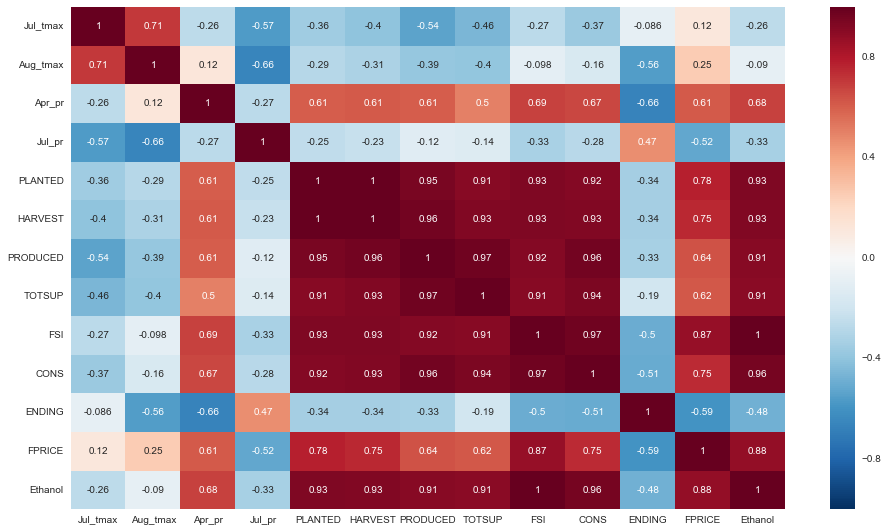

In [225]:
plt.figure(figsize=(16,9))
sns.heatmap(cornC[cornPC3.index].corr(), annot=True)

There are several feature variables which present the problem of [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity). We can see from the above that PLANTED, HARVEST, PRODUCED and Total Supply (TOTSUP) possess strong correlation with one-another. We can also see that Food Seed Industrial Usage (FSI), Total Consumption (CONS), and Ethanol also bear strong correlation. 

We will rely on the cornPC3 dataframe above, detailing how these variables correlate with FPRICE, to determine which should remain in our model. 